In [10]:
import pandas as pd
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [14]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [15]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=10)

In [25]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [23]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, y_train, cv=4)
scores

array([0.77578475, 0.79820628, 0.77578475, 0.78828829])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7890011223344556
Precision: 0.7238372093023255
Recall: 0.7280701754385965
F1-score: 0.7259475218658892


In [32]:
# Predict survival probabilities for passengers in the test dataset
survival_probabilities = model.predict_proba(X_test)[:, 1]

# Add the survival probabilities to the test dataframe
test['survival_probability'] = survival_probabilities

# Save the modified DataFrame to a new CSV file (optional)
test.to_csv('test_with_predictions.csv', index=False)


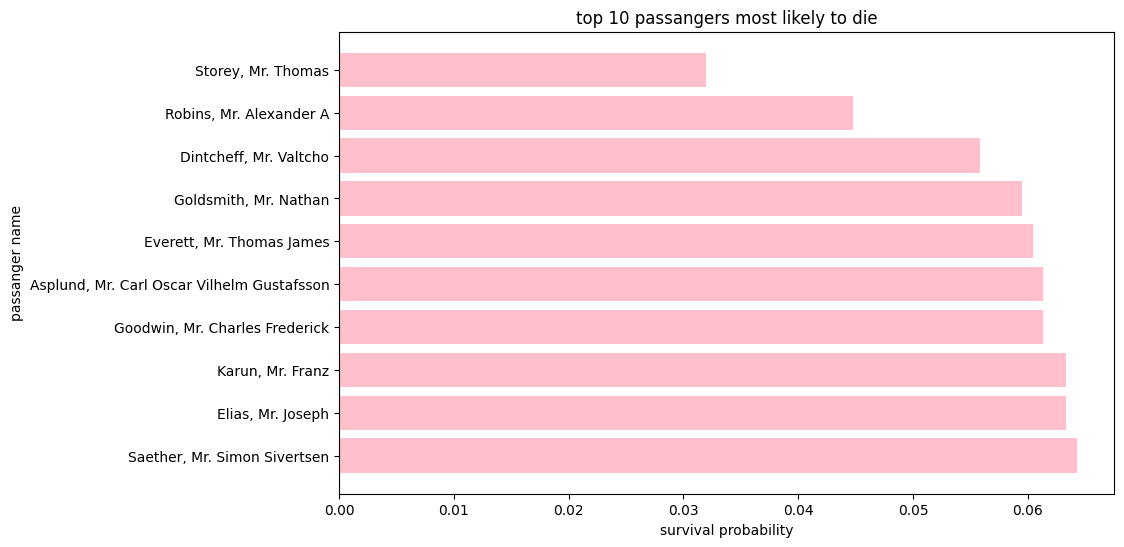

In [35]:
import matplotlib.pyplot as plt

predicted_deaths = test.sort_values(by='survival_probability', ascending=True)
pastel_red = (255/255, 192/255, 203/255)

#plotting
plt.figure(figsize=(10, 6))
plt.barh(predicted_deaths['Name'][:10], predicted_deaths['survival_probability'][:10], color=pastel_red)
plt.xlabel('survival probability')
plt.ylabel('passanger name')
plt.title('top 10 passangers most likely to die')
plt.gca().invert_yaxis() # invert y-axis to display highest probability at the top
plt.show()